In [1]:
# import libraries 
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore') 


## Gradient Discent (in general)

It is an optimization algorithm to find the minimum of a function. We start with a random point on the function and move in the negative direction of the gradient of the function to reach the local/global minima.

#### Lets say the function is y=(x-5)² 

In [2]:
X = np.arange(-5,20) 
y = (X-5)**2 
print(X) 
print(y)

[-5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18
 19]
[100  81  64  49  36  25  16   9   4   1   0   1   4   9  16  25  36  49
  64  81 100 121 144 169 196]


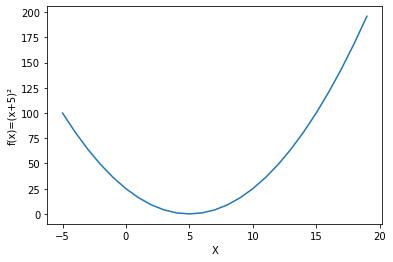

In [3]:
# lets visualize the function 
plt.plot(X,y) 
plt.ylabel('f(x)=(x+5)²') 
plt.xlabel('X')
plt.show()

## Gradient discent formula


## $$ \theta^{t} = \theta^{t-1}-\eta\frac{\partial J}{\partial \theta^{t-1}} $$ 

where

$ \theta^{t} $  -> next step or next point

$ \theta^{t-1} $  -> previous step or previous point

$ \eta $  -> Learning rate

J -> function which we have to minimise 

$ \frac{\partial J}{\partial \theta^{t-1}} $ -> partial derivative of that function or called Gradient 

In [4]:
# lets find the minimum of that function y = (X-5)**2 
# lets start from x = 15 

X = 15 # starting point 
lr = 0.1 # learning rate
 
for i in range(100): # lets take 100 iteration 
    grad = 2*(X-5) # darivative of that function or gradient 
    X=X-lr*grad # applying formula 
print(X)
    

5.000000002037036


### conclusion 
* So approximately 5 is our global minima for the function y = (X-5)**2 . 
* That means at the value of X = 5 our function in minimum .

5.000000002037036


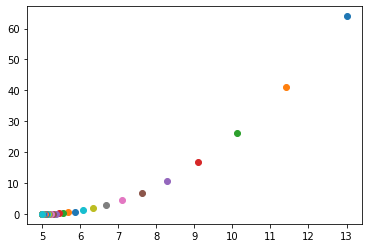

In [5]:
# let's visualize how we iteratively converge to the local minima. 
X = 15 
lr = 0.1 
 
for i in range(100): 
    grad = 2*(X-5)
    X=X-lr*grad 
    y = (X-5)**2 
    plt.scatter(X,y)
print(X)

## Gradient Discent in Linear Regression 

In [6]:
# lets take a dataset called housing.csv 
housing = pd.read_csv(r'E:\linkdin post project\Gradient Discent\housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [7]:
#Converting furnishingstatus column to binary column using get_dummies
status = pd.get_dummies(housing['furnishingstatus'],drop_first=True)
housing = pd.concat([housing,status],axis=1)
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [8]:
# Normalisisng the data
housing = (housing - housing.mean())/housing.std()
housing.head() 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,-0.844113,-0.69579
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,-0.844113,-0.69579
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,1.182502,-0.69579
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,-0.844113,-0.69579
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,-0.844113,-0.69579


## Simple Linear Regression 

In [9]:
# lets say we want to predict the house price using the area attributes 
# Assign feature variable or independent variable X
X = housing['area']

# Assign response variable or dependent variable to y 
y = housing['price']

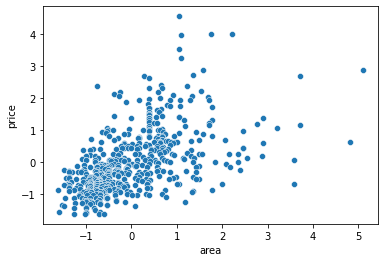

In [10]:
# lets visualize relationship between the features and the response using scatterplots
sns.scatterplot(X,y) 
plt.show()

## For linear regression we use a cost function known as the mean squared error or MSE.

### Formula 

### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} -\hat{y} \big)^2 $$ 
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$ 
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - \big( mx^{(i)}+c \big)\big)^2 $$ 
where 

n = number of items 

$ y^{(i)} $ = actual point 

$ \hat{y} $ = $ h_\theta x^{(i)} $ = $ mx^{(i)}+c $ = predicted point 

m = slope 

c = intercept

## So our goal is to find the best m and c value where our MSE should be minimum .

## As per Gradient Discent Formula we have to differentiate our cost function first and then put that in to the formula .


# Partial Darivation of MSE w.r.t slope(m) and intercept(c) 
## $$\frac{\partial MSE}{\partial m} = - \frac{2}{n} \sum_{i=1}^n \big( y^{(i)} - mx^{(i)} - c \big)\big( x^{(i)} \big) $$ 
## $$\frac{\partial MSE}{\partial c} = - \frac{2}{n} \sum_{i=1}^n \big( y^{(i)} - mx^{(i)} - c \big) $$

In [11]:
# now for applying gradient discent we need our X,y variables as numpy array 
X = np.array(X) 
y = np.array(y) 

In [12]:
# lets implement the gradient descent function 
# lets initialised current m and c to 0 

def gradient_discent_simple(X,y):
    m = 0 
    c = 0 
    n = float(len(y)) 
    iters = 1000 # take 1000 iteration 
    learning_rate = 0.01 
    df = pd.DataFrame(columns = ['m','c','cost'])# make a dataframe to keep track how the costs are minimising in each iteration
    for i in range(iters):
        y_pred = m*X+c # prediction values 
        cost = sum([i**2 for i in (y-y_pred)])/n 
        d_m = (-2/n)*sum(X*(y-y_pred))#darivative w.r.t m
        d_c = (-2/n)*sum(y-y_pred)#darivative w.r.t c 
        # we are doing the derivation for minimising the cost 
        # after darivation we have to update the m and c 
        m = m - (learning_rate*d_m) 
        c = c - (learning_rate*d_c) 
        df.loc[i] = [m,c,cost] # keep track of each cost in each iteration  
    df.reset_index().plot.line(x='index', y=['cost']) 
    return f'final slope and intercept after 1000 iteration is {round(m,3),round(c,3)}'

'final slope and intercept after 1000 iteration is (0.536, 0.0)'

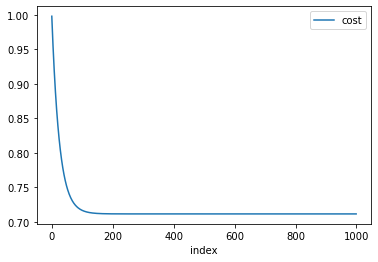

In [13]:
gradient_discent_simple(X,y)

 * We can clearly see that after 200 iterations the cost was not decreasing much which means we get our global minima. 

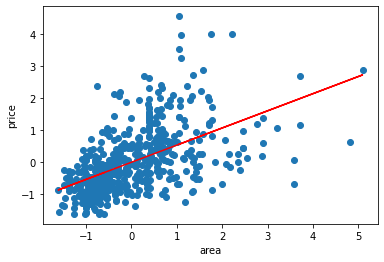

In [14]:
# lets visualize how the line was fitted 
y_pred = 0.536*X+0.0
plt.scatter(X,y)
plt.plot(X,y_pred,color = 'red')
plt.xlabel('area')
plt.ylabel('price') 
plt.show()

#### Note 
* learning rate is the speed at which we want to move towards negetive of the gradient . 
* it's always a good practice to choose a small value of learning rate and slowly move towards the nagative of the gradient . 

## Multiple Linear Regression 
#### Applying Gradient Descent for Multiple (>1) Features

In [15]:
# Assigning feature variable X 
# lets now take 2 features area and bedrooms 
X = housing[['area','bedrooms']]

# Assigning response variable y
y = housing['price']

# Note 
* when we have more then one features the model now fit a hyperplane instade of line .  
### $$ y = \theta_0 + \theta_1x_1 + \theta_2x_2... + \theta_nx_n $$ 
* The cost function here is slightly different from MSE we just dividing the MSE by half (1/2) to get a nice interpretation .
### $$J(\theta_0,\theta_1) = \frac{1}{2n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta\big( x^{(i)}\big) \big)^2 $$  
### $$J(\theta_0,\theta_1,...,\theta_i) = \frac{1}{2n} \sum_{i=1}^{n} \big( y^{(i)} -  \big( \theta_0 + \theta_1x_1 + \theta_2x_2... + \theta_ix_i \big)\big)^2 $$ 
### we have to first differentiate w.r.t. all thetas and then update each thetas . 
#### $$\frac{\partial J(\theta_0,\theta_1,...,\theta_i)}{\partial \theta_0} = \frac{1}{n} \sum_{i=1}^n \big( y^{(i)} - h_\theta\big( x^{(i)}\big)\big)\big( x_0^{(i)}\big) $$ 
#### $$\frac{\partial J(\theta_0,\theta_1,...,\theta_i)}{\partial \theta_1} = \frac{1}{n} \sum_{i=1}^n \big( y^{(i)} - h_\theta\big( x^{(i)}\big)\big)\big( x_1^{(i)}\big) $$ 
$$...$$
#### $$\frac{\partial J(\theta_0,\theta_1,...,\theta_i)}{\partial \theta_i} = \frac{1}{n} \sum_{i=1}^n \big( y^{(i)} - h_\theta\big( x^{(i)}\big)\big)\big( x_i^{(i)}\big) $$
* We need to minimise the cost function J(θ) One way to do this is to use the batch gradient decent algorithm. In batch gradient decent, the values are updated in each iteration: 
#### $$\theta_0 = \theta_0 -\alpha \frac{1}{n} \sum_{i=1}^n \big( y^{(i)} - h_\theta\big( x^{(i)}\big)\big)\big( x_0^{(i)} \big) $$ 
#### $$\theta_1 = \theta_1 -\alpha \frac{1}{n} \sum_{i=1}^n \big( y^{(i)} - h_\theta\big( x^{(i)}\big)\big)\big( x_1^{(i)} \big) $$ 
#### $$\theta_2 = \theta_2 -\alpha \frac{1}{n} \sum_{i=1}^n \big( y^{(i)} - h_\theta\big( x^{(i)}\big)\big)\big( x_2^{(i)} \big) $$ 
$$...$$
#### $$\theta_n = \theta_n -\alpha \frac{1}{n} \sum_{i=1}^n \big( y^{(i)} - h_\theta\big( x^{(i)}\big)\big)\big( x_n^{(i)} \big) $$ 
* Now here we are taking the help of matrix multiplication because we are deal with more than one features . 

In [16]:
# Add a columns of 1s as an intercept to X.
# The intercept column is needed for convenient matrix representation of cost function

X['intercept'] = 1
X = X.reindex(['intercept','area','bedrooms'], axis=1)
X.head()

,intercept,area,bedrooms
0,1,1.045766,1.402131
1,1,1.755397,1.402131
2,1,2.216196,0.047235
3,1,1.082630,1.402131
4,1,1.045766,1.402131


In [17]:
# Convert X and y to arrays
import numpy as np
X = np.array(X)
y = np.array(y)

In [18]:
# Theta is the vector representing coefficients (intercept, area, bedrooms)
theta = np.matrix(np.array([0,0,0])) 
alpha = 0.01
iterations = 1000

In [19]:
# define cost function
# takes in theta (current values of coefficients ), X and y
# returns total cost at current θ1 , θ2 ,θ3

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [20]:
# gradient descent
# takes in current X, y, learning rate alpha, num_iters
# returns cost (notice it uses the cost function defined above)

def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    n = len(X)
    df = pd.DataFrame( columns = ['coefficients','cost'])

    for i in range(iterations):
        cost = compute_cost(X, y, theta)
        derivative  = (1/n) * np.matmul(X.T, np.matmul(X, theta) - y) # we are doing derivative for minimizing the cost 
        theta = theta - alpha * derivative # here we have to update our theta means we are going to next step 
        df.loc[i] = [theta,cost]
    df.reset_index().plot.line(x='index', y=['cost']) 
    return df.tail() , f'final coefficients are {df.iloc[999,0]} '

(                                          coefficients      cost
 995  [3.3328691488600403e-16, 0.4916558741575689, 0...  0.314176
 996  [3.3359248085608434e-16, 0.49165609672441263, ...  0.314176
 997  [3.337635977993293e-16, 0.4916563172711537, 0....  0.314176
 998  [3.3429324548080186e-16, 0.4916565358164564, 0...  0.314176
 999  [3.3447658506285006e-16, 0.49165675237880896, ...  0.314176,
 'final coefficients are [3.34476585e-16 4.91656752e-01 2.91844700e-01] ')

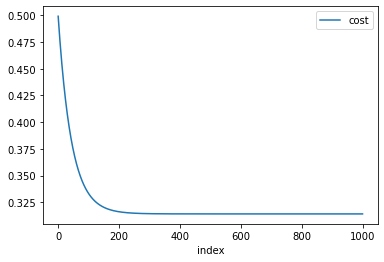

In [21]:
# print costs with various values of coefficients b0, b1, b2
gradient_descent_multi(X, y, theta, alpha, iterations)

 * We can clearly see that after 200 iterations the cost was not decreasing much which means we get our global minima. 
 
 
 
 

# EXAMPLE 2

In [22]:
# lets take a dataset called advartising.csv 
advartising = pd.read_csv(r'E:\\advertising (1).csv')
advartising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [23]:
# Normalisisng the data
advartising = (advartising - advartising.mean())/advartising.std()
advartising.head()

,TV,Radio,Newspaper,Sales
0,0.967425,0.979066,1.774493,1.548168
1,-1.194379,1.080097,0.667903,-0.694304
2,-1.512360,1.524637,1.779084,-0.905135
3,0.051919,1.214806,1.283185,0.858177
4,0.393196,-0.839507,1.278593,-0.215143


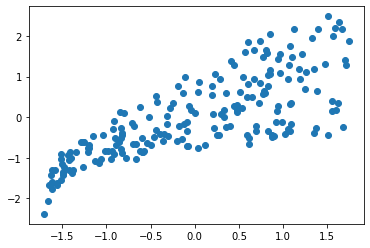

In [24]:
# Assigning feature variable X 
# lets see how attribute 'TV' affects 'Sales' 
X = advartising['TV']

# Assigning response variable y
y = advartising['Sales'] 

plt.scatter(X,y)

'final slope and intercept after 1000 iteration is (0.782, -0.0)'

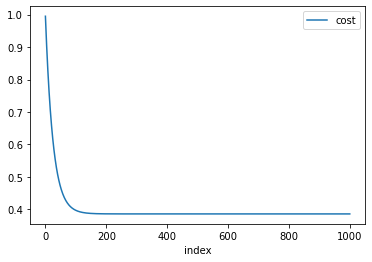

In [25]:
# first convert X,y to numpy array 
X = np.array(X)
y = np.array(y) 
# call the function 
gradient_discent_simple(X,y)

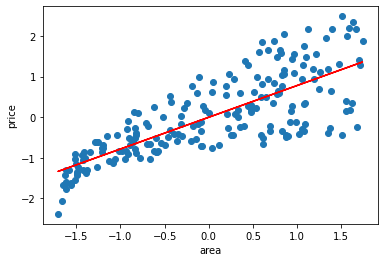

In [26]:
# lets visualize how the line was fitted 
y_pred = 0.782*X-0.0
plt.scatter(X,y)
plt.plot(X,y_pred,color = 'red')
plt.xlabel('area')
plt.ylabel('price') 
plt.show()

In [27]:
# Assigning feature variable X 
# lets now take all features 
X = advartising[['TV','Radio','Newspaper']]

# Assigning response variable y
y = advartising['Sales']

In [28]:
# Add a columns of 1s as an intercept to X.
# The intercept column is needed for convenient matrix representation of cost function

X['intercept'] = 1
X = X.reindex(['TV','Radio','Newspaper'], axis=1)
X.head()

,TV,Radio,Newspaper
0,0.967425,0.979066,1.774493
1,-1.194379,1.080097,0.667903
2,-1.512360,1.524637,1.779084
3,0.051919,1.214806,1.283185
4,0.393196,-0.839507,1.278593


In [29]:
# Convert X and y to arrays
import numpy as np
X = np.array(X)
y = np.array(y)

In [30]:
# Theta is the vector representing coefficients (intercept, area, bedrooms)
theta = np.matrix(np.array([0,0,0,0])) 
alpha = 0.01
iterations = 1000

(                                          coefficients      cost
 995  [0.7530275184009089, 0.5360440327094922, -0.00...  0.051138
 996  [0.7530278865846947, 0.5360468290216982, -0.00...  0.051138
 997  [0.7530282512106896, 0.5360496075026058, -0.00...  0.051138
 998  [0.7530286123134639, 0.5360523682656025, -0.00...  0.051138
 999  [0.75302896992725, 0.5360551114233569, -0.0038...  0.051138,
 'final coefficients are [ 0.75302897  0.53605511 -0.0038943 ] ')

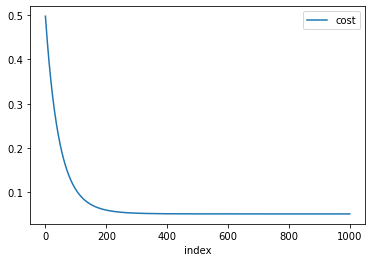

In [31]:
# call the function
gradient_descent_multi(X, y, theta, alpha, iterations)

In [32]:
print('@'*50+'THE END'+'@'*50)

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@THE END@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
